In [2]:
# 2. Disease prediction (bonus)

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# read the data
df_heart=pd.read_csv('Data3/cardio_train.csv', delimiter=';', index_col=0)

In [5]:
# df_heart
# df_heart.info()
df_heart

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


Utforska om det finns några konstigheter i datan

In [6]:
# df_heart['active'].describe() # Ok
# df_heart['alco'].describe() # ok
# df_heart['cardio'].describe() # ok
# df_heart['cholesterol'].describe() # 0k
# df_heart['age'].describe() # ok
# df_heart['gender']. value_counts() # Ok
# df_heart['gluc'].value_counts() # Ok
# df_heart['smoke'].value_counts() # Ok


# df_heart['ap_hi'].describe() # - investigate, min value
# df_heart['ap_lo'].describe() # - investigate, min value
# df_heart['height'].describe() # - investigate, min value 55?
# df_heart['weight'].describe() # - investigate, min 10, max 200?

# 2.0 - EDA uppvärmning

## a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

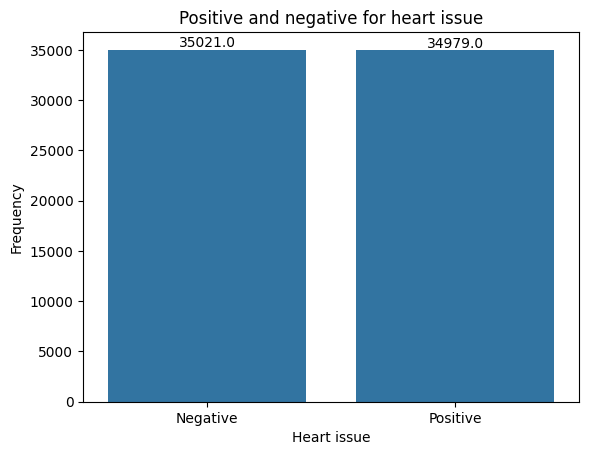

In [23]:

df_heart['Cardio'] = df_heart['cardio'].replace({0: 'Negative', 1: 'Positive'})
ax=sns.countplot(x='Cardio', data=df_heart)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()-700), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Heart issue')
plt.ylabel('Frequency')
plt.title('Positive and negative for heart issue')

plt.show()

b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

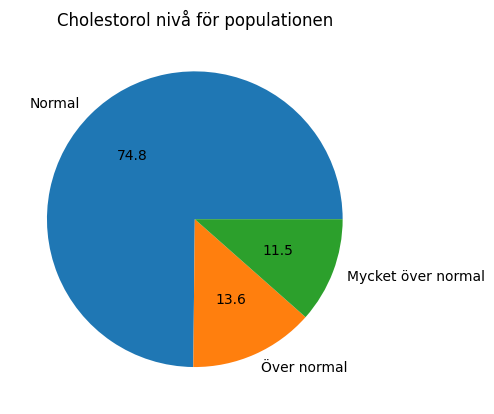

In [9]:
df_heart['Chol']=df_heart['cholesterol'].replace({1:'Normal', 2:'Över normal', 3:'Mycket över normal'})

# fixa tårt diagram

#sns.countplot(x='Chol', data=df_heart)

pal_col= sns.color_palette('dark')

df_heart['Chol'].value_counts().plot(kind='pie',autopct='%.1f')


plt.title('Cholestorol nivå för populationen')
plt.xlabel('')
plt.ylabel('')

plt.show()


c) Hur ser åldersfördelningen ut? Rita ett histogram.

<Axes: xlabel='age', ylabel='Count'>

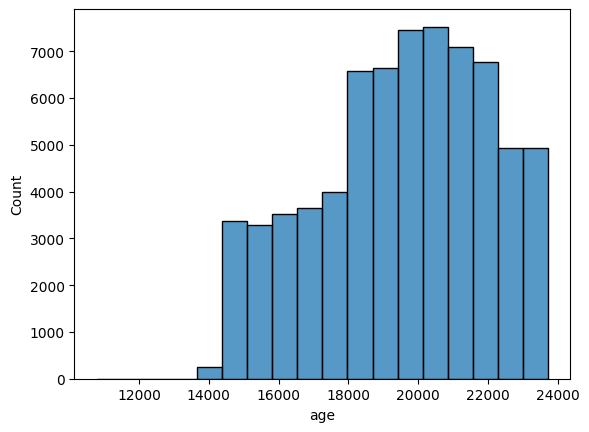

In [25]:
sns.histplot(df_heart['age'], binwidth= 700,)

d) Hur stor andel röker?


In [12]:
df_heart['smoke'].value_counts()

smoke
0    63831
1     6169
Name: count, dtype: int64

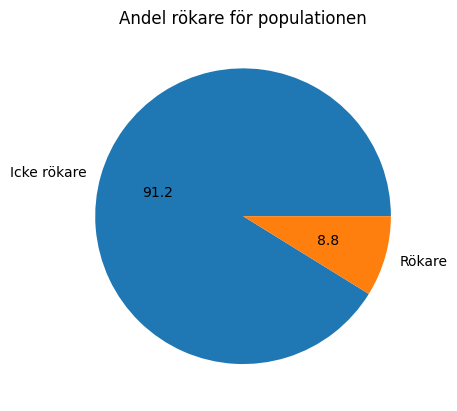

In [13]:
df_heart['Smoke']=df_heart['smoke'].replace({0:'Icke rökare', 1:'Rökare'})

pal_col= sns.color_palette('dark')

df_heart['Smoke'].value_counts().plot(kind='pie',autopct='%.1f')

plt.title('Andel rökare för populationen')
plt.xlabel('')
plt.ylabel('')

plt.show()

e) Hur ser viktfördelningen ut? Rita lämpligt diagram.


In [28]:
df_heart['weight'].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

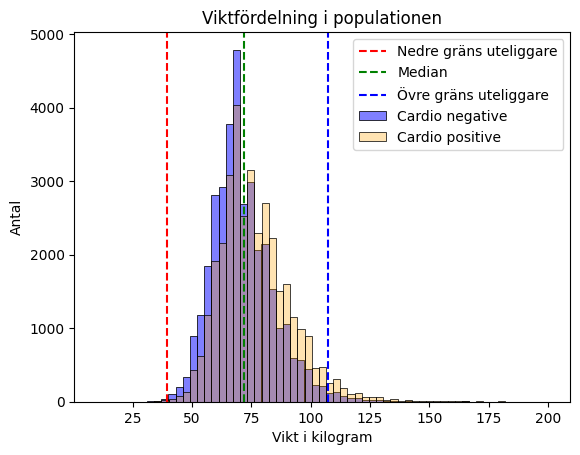

In [47]:
# Fixa så att vi får vikterna för resp kategori

cardio_negatives = df_heart[df_heart['cardio'] == 0]['weight']
cardio_positives = df_heart[df_heart['cardio'] == 1]['weight']

# Skapa histogram för positiva och negativa
sns.histplot(data=cardio_negatives, color='blue', alpha=0.5, label='Cardio negative', binwidth=3)
sns.histplot(data=cardio_positives, color='orange', alpha=0.3, label='Cardio positive', binwidth=3)

plt.title('Viktfördelning i populationen')

q1 = np.percentile(df_heart['weight'], 25)
q2 = np.percentile(df_heart['weight'], 50)
q3 = np.percentile(df_heart['weight'], 75)

# Beräkna uteliggare (nedre och övdre gräns)

low_out=q1-(q3-q1)*1.5
high_out=q3+(q3-q1)*1.5

# Lägg till horizontella linjer för uteliggare och median
plt.axvline(low_out, color='r', linestyle='--', label='Nedre gräns uteliggare')
plt.axvline(q2, color='g', linestyle='--', label='Median')
plt.axvline(high_out, color='b', linestyle='--', label='Övre gräns uteliggare')

# Lägg till fig. legend
plt.legend()

plt.ylabel('Antal')
plt.xlabel('Vikt i kilogram')
#plt.ylim(10, 250)

plt.show()

f) Hur ser längdfördelningen ut? Rita lämpligt diagram.


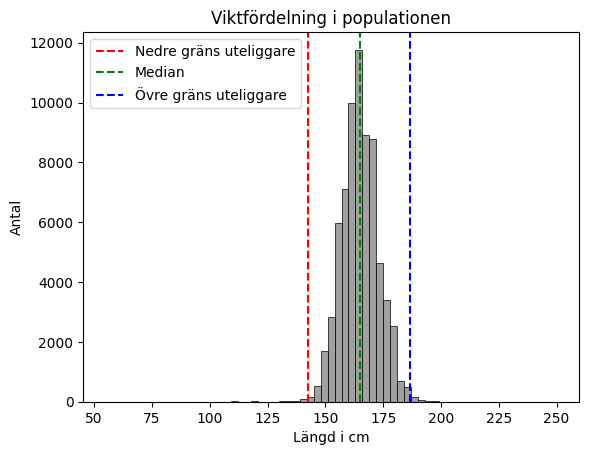

In [52]:

sns.histplot(data=df_heart['height'], color='grey', binwidth=3)

plt.title('Viktfördelning i populationen')

q1 = np.percentile(df_heart['height'], 25)
q2 = np.percentile(df_heart['height'], 50)
q3 = np.percentile(df_heart['height'], 75)

# Beräkna uteliggare (nedre och övdre gräns)

low_out=q1-(q3-q1)*1.5
high_out=q3+(q3-q1)*1.5

# Lägg till horizontella linjer för uteliggare och median
plt.axvline(low_out, color='r', linestyle='--', label='Nedre gräns uteliggare')
plt.axvline(q2, color='g', linestyle='--', label='Median')
plt.axvline(high_out, color='b', linestyle='--', label='Övre gräns uteliggare')

# Lägg till fig. legend
plt.legend()

plt.ylabel('Antal')
plt.xlabel('Längd i cm')
#plt.ylim(10, 250)

plt.show()

g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

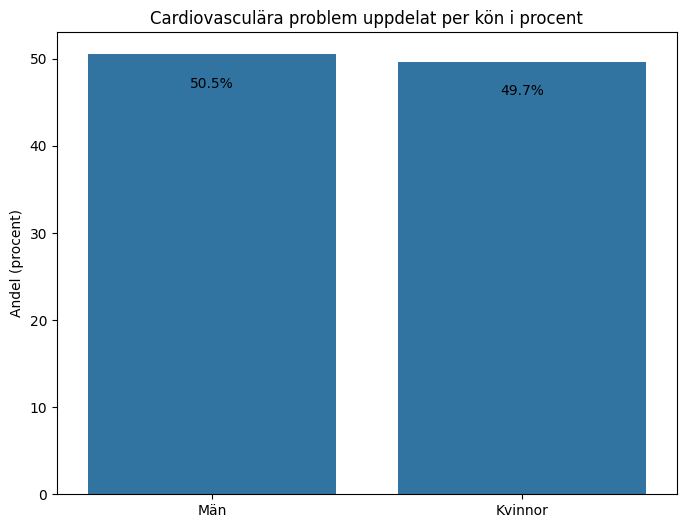

In [109]:
# gender 1 - women, 2 - men

women=df_heart[df_heart['gender']==1]['gender'].count()
men=df_heart[df_heart['gender']==2]['gender'].count()

women_cardio=df_heart[(df_heart['cardio']==1) & (df_heart['gender']==1)]['cardio'].count()
men_cardio=df_heart[(df_heart['cardio']==1) & (df_heart['gender']==2)]['cardio'].count()


# Data to plot
labels = ['Män','Kvinnor']
datas = [men_cardio/men*100, women_cardio/women*100]
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=labels, y=datas)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 1)}%', (p.get_x() + p.get_width() / 2., p.get_height()-5), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Cardiovasculära problem uppdelat per kön i procent')
plt.ylabel('Andel (procent)')
plt.show()

## 2.1.0 - Feature engineering BMI

Skapa en feature för BMI (Body Mass Index)

BMI= $\frac{vikt}{längd^{2}}$

In [115]:

df_heart['BMI']=df_heart['weight']/((df_heart['height']/100)**2)

df_heart['BMI'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

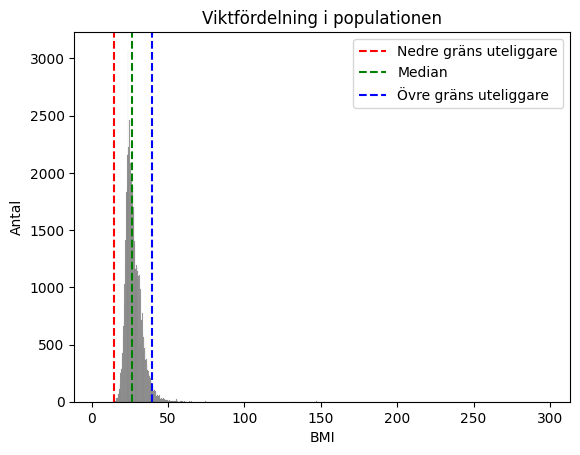

In [114]:
sns.histplot(data=df_heart['BMI'], color='grey')

plt.title('Viktfördelning i populationen')

q1 = np.percentile(df_heart['BMI'], 25)
q2 = np.percentile(df_heart['BMI'], 50)
q3 = np.percentile(df_heart['BMI'], 75)

# Beräkna uteliggare (nedre och övdre gräns)

low_out=q1-(q3-q1)*1.5
high_out=q3+(q3-q1)*1.5

low_out2=q1-(q3-q1)*3
high_out2=q3+(q3-q1)*3

# Lägg till horizontella linjer för uteliggare och median
plt.axvline(low_out, color='r', linestyle='--', label='Nedre gräns uteliggare')
plt.axvline(q2, color='g', linestyle='--', label='Median')
plt.axvline(high_out, color='b', linestyle='--', label='Övre gräns uteliggare')

# Lägg till fig. legend
plt.legend()

plt.ylabel('Antal')
plt.xlabel('BMI')
#plt.ylim(10, 250)

plt.show()

<ul>
<li> Severely underweight - BMI less than 16.5kg/m^2 
<li> Underweight - BMI under 18.5 kg/m^2
<li> Normal weight - BMI greater than or equal to 18.5 to 24.9 kg/m^2
<li> Overweight – BMI greater than or equal to 25 to 29.9 kg/m^2
<li>Obesity – BMI greater than or equal to 30 kg/m^2
    <ul>
    <li>Obesity class I – BMI 30 to 34.9 kg/m^2
    <li>Obesity class II – BMI 35 to 39.9 kg/m^2
    <li>Obesity class III – BMI greater than or equal to 40 kg/m^2 (also referred to as severe, extreme, or massive obesity)
    </ul>
</ul>
<ref>BMI Classification Percentile And Cut Off Points. Connor B. Weir; Arif Jan. Treasure Island (FL): StatPearls Publishing; 2024 Jan</ref>

Eftersom det finns en del extremvärden (höga BMIs) så finns det anledning att tro att BMI > 57 är felaktiga. När det gäller låga BMI så anses det att BMI<10 är ovanliga.
<ref> Mortality in extremely low BMI anorexia nervosa patients – implications of gastrointestinal and endocrine system dysfunction
Suszko M., Sobocki J., Imieliński C., Psychiatr Pol 2022;56(1):89-100

Dett får tyill följd att vi i denna undersökning bara beaktar personer med BMI i intervallet 11 till 56.

<Axes: xlabel='BMI', ylabel='Count'>

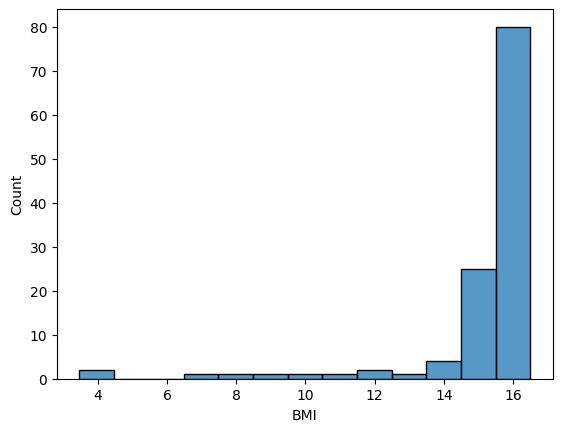

In [143]:
sns.histplot(data=df_heart[df_heart['BMI']<16.5]['BMI'], binwidth=1)